<h1 text-allign='center'> Исследование текучки </h1>

## 1. Импорт библиотек

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## 2. Загрузка данных

In [2]:
df = pd.read_excel('D:datasets\case.xlsx', sheet_name='Опрос удовлетворенности')

In [3]:
df.head()

Ваш возраст В каком филиале\nВы работаете?  \
0          28                            СПб   
1          44                            СПб   
2          99                            СПб   
3          23                            СПб   
4          26                            СПб   

  Укажите, пожалуйста, сферу деятельности, в которой вы работаете  \
0  Методико-аналитическая деятельность (все депар...                
1  Разработка, программирование (все стеки, все д...                
2  Разработка, программирование (все стеки, все д...                
3  Разработка, программирование (все стеки, все д...                
4    Управление проектной, продуктовой деятельностью                

  Стаж работы в Компании  \
0       От года до 3 лет   
1            Более 8 лет   
2                До года   
3       От года до 3 лет   
4       От года до 3 лет   

  Я оцениваю Компанию как оптимальное для себя место работы  \
0                                        Не согласен          
1                               Затрудняюсь ответить          
2                                 Скорее не согласен          
3                               Затрудняюсь ответить          
4                                 Скорее не согласен          

  В ближайшие несколько лет я планирую работать в Компании  \
0                                        Не согласен         
1                                    Скорее согласен         
2                                        Не согласен         
3                               Затрудняюсь ответить         
4                                        Не согласен         

  У меня есть все необходимые материалы и оборудование для качественного выполнения своей работы  \
0                                 Полностью согласен                                               
1                                 Скорее не согласен                                               
2                                    Скорее согласен                                               
3                                    Скорее согласен                                               
4                                 Скорее не согласен                                               

  Офисное пространство и интерьер располагает к продуктивной работе  \
0                               Затрудняюсь ответить                  
1                                    Скорее согласен                  
2                                 Скорее не согласен                  
3                               Затрудняюсь ответить                  
4                                 Скорее не согласен                  

  Рабочий график позволяет мне эффективно сбалансировать работу и личную жизнь  \
0                                        Не согласен                             
1                                    Скорее согласен                             
2                                    Скорее согласен                             
3                                    Скорее согласен                             
4                               Затрудняюсь ответить                             

  Мне приятно рассказывать о своей работе своим близким и друзьям  ...  \
0                               Затрудняюсь ответить               ...   
1                                 Скорее не согласен               ...   
2                                 Скорее не согласен               ...   
3                                 Скорее не согласен               ...   
4                                        Не согласен               ...   

  В случае необходимости я могу получить поддержку более опытных коллег  \
0                                    Скорее согласен                      
1                                        Не согласен                      
2                                 Скорее не согласен                      
3                                    Скорее согласен                      
4                                   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 39 columns):
 #   Column                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                       --------------  -----  
 0   Ваш возраст                                                                                                                                  236 non-null    object 
 1   В каком филиале
Вы работаете?                                                                                                                236 non-null    object 
 2   Укажите, пожалуйста, сферу деятельности, в которой вы работаете                                                                              235 non-null    object 
 3   Стаж работы в Компании                  

## 3. Предобработка данных

### 3.1 Заполнение пропусков

Проверям, сколько в каждом столбце пропусков

In [22]:
a = []
for i in df:
    a.append(df[i].isna().sum())
a

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
df.isna().sum()

Ваш возраст                                                                                                                                       0
В каком филиале\nВы работаете?                                                                                                                    0
Укажите, пожалуйста, сферу деятельности, в которой вы работаете                                                                                   1
Стаж работы в Компании                                                                                                                            0
Я оцениваю Компанию как оптимальное для себя место работы                                                                                         0
В ближайшие несколько лет я планирую работать в Компании                                                                                          0
У меня есть все необходимые материалы и оборудование для качественного выполнения своей работы                  

#### Пропуски содержатся только в котегориальных данных, поэтому их заполним значением 'unknown'
Проверяем наличие пропусков после заполнения

In [6]:
df.fillna('unknown', inplace = True)
print('Сумма пропусков данных:''\n',
      df.isna().sum().sum())

Сумма пропусков данных:
 0


### 3.2 Исправление данных

Рассмотрим уникальные значения всех столбцов

In [7]:
def check_unique(i):
    print(i)
    print()
    if df[i].dtype == "int64":
        print(df[i].value_counts().sort_index())
    else:
        print(df[i].value_counts())
    print()
        

In [8]:
for i in df:
    check_unique(i)

Ваш возраст

26          13
29          11
34          11
24          11
31          10
25          10
30          10
36           9
28           8
23           8
43           8
27           8
33           7
35           7
32           7
40           7
50           7
44           6
39           6
45           6
38           5
42           5
47           4
37           4
56           4
20           4
22           4
51           3
58           3
21           2
41           2
55           2
61           2
49           2
54           2
53           2
48           2
0            2
45-50        1
43 года      1
46           1
59           1
99           1
52           1
62           1
30-60 :)     1
За 40        1
57           1
30-40        1
48 лет       1
Name: Ваш возраст, dtype: int64

В каком филиале
Вы работаете?

СПб                                   204
Крым                                   24
Работаю удаленно из другого города      8
Name: В каком филиале\nВы работаете?, dtype: in

**В столбце 'Ваш возраст' есть неправильно заполненные данные, некоторые имеют строковый тип или аномальные значения**

In [9]:
check_unique('Ваш возраст')

Ваш возраст

26          13
29          11
34          11
24          11
31          10
25          10
30          10
36           9
28           8
23           8
43           8
27           8
33           7
35           7
32           7
40           7
50           7
44           6
39           6
45           6
38           5
42           5
47           4
37           4
56           4
20           4
22           4
51           3
58           3
21           2
41           2
55           2
61           2
49           2
54           2
53           2
48           2
0            2
45-50        1
43 года      1
46           1
59           1
99           1
52           1
62           1
30-60 :)     1
За 40        1
57           1
30-40        1
48 лет       1
Name: Ваш возраст, dtype: int64



Заменим неправильно заполненные данныые

In [10]:
replace_dict = {'43 года': 43, '30-60 :)': 45, 'За 40': 40, '30-40': 35, '48 лет': 48, '45-50': 47}
df['Ваш возраст'].replace(replace_dict, inplace=True)
df['Ваш возраст'].unique()

array([28, 44, 99, 23, 26, 31, 43, 25, 34, 40, 42, 47,  0, 22, 29, 35, 24,
       27, 30, 33, 39, 45, 51, 59, 20, 21, 32, 37, 38, 48, 53, 54, 56, 36,
       41, 46, 49, 50, 52, 58, 62, 61, 55, 57], dtype=int64)

Избавимся от аномальных значений

In [11]:
df[(df['Ваш возраст'] < 17) & (df['Ваш возраст'] > 91)]

Empty DataFrame
Columns: [Ваш возраст, В каком филиале
Вы работаете?, Укажите, пожалуйста, сферу деятельности, в которой вы работаете, Стаж работы в Компании, Я оцениваю Компанию как оптимальное для себя место работы, В ближайшие несколько лет я планирую работать в Компании, У меня есть все необходимые материалы и оборудование для качественного выполнения своей работы, Офисное пространство и интерьер располагает к продуктивной работе, Рабочий график позволяет мне эффективно сбалансировать работу и личную жизнь, Мне приятно рассказывать о своей работе своим близким и друзьям, Моя работа позволяет в полной мере реализовывать мои способности, Моя текущая работа дает возможность развиваться как профессионалу, Поставленные передо мной задачи соответствуют моим интересам, На работе у меня есть возможность проявлять инициативу и воплощать свои идеи, Я обладаю всеми полномочиями для выполнения стоящих передо мной задач, Я четко понимаю, каких результатов от меня ожидают, Все поставленные передо мной задачи выполнимы, Поставленные передо мной задачи соответствуют моему уровню профессионализма, Взаимодействие сотрудников нашего отдела/департамента хорошо организовано, Я получаю регулярную оценку своей работы от своего непосредственного руководителя, Я считаю, что оценка моей работы объективна и справедлива, При постановке задач мой руководитель интересуется моим мнением, Руководство относится ко мне с уважением, Мне понятны решения, принимаемые руководством Компании, Я считаю, что оплата труда соответствует уровню моего профессионализма и результатам моей работы, Работая в Компании, я чувствую уверенность в завтрашнем дне, Мне НЕ приходится искать дополнительные источники дохода, Компания поощряет профессиональный рост своих сотрудников, Компания предоставляет возможность получить знания и навыки, необходимые для выполнения поставленных задач, В случае необходимости я могу получить поддержку более опытных коллег, У меня есть доступ к информации, которая помогает лучше выполнять мою работу, Я считаю, что моя текущая должность соответствует моему уровню профессионализма и заслугам перед Компанией, Я вижу возможность сделать карьеру в Компании, Все подразделения Компании работают на общий результат, Я оцениваю атмосферу в Компании как доброжелательную и направленную на продуктивную работу, В случае обращения за помощью к коллегам, я, скорее всего, ее получу, Насколько вы готовы порекомендовать Компанию в качестве места работы своим друзьям или знакомым? 
(0 не готов- 10 Обязательно порекомендую), Почему Вы поставили такую оценку?:, Если Вам хотелось бы что-то добавить, сделайте это здесь:]
Index: []

[0 rows x 39 columns]

In [12]:
df = df[(df['Ваш возраст'] > 17) & (df['Ваш возраст'] < 91)]

Далее в столбце 'Укажите, пожалуйста, сферу деятельности, в которой вы работаете' обрабатываем неявные дубликаты 

In [13]:
check_unique('Укажите, пожалуйста, сферу деятельности, в которой вы работаете')

Укажите, пожалуйста, сферу деятельности, в которой вы работаете

Методико-аналитическая деятельность (все депаратаменты)             71
Разработка, программирование (все стеки, все департаменты)          63
Административный персонал (ДСА, ФД, ДУП, ОКУ, ОСО)                  33
Сопровождение клиентов, продажи, сопровождение пользователей, ЛК    26
Управление проектной, продуктовой деятельностью                     25
Менеджмент (управление отделом, группой, департаментом)              8
Проектирование                                                       1
администрирование внутренних систем                                  1
продвижение                                                          1
unknown                                                              1
производство                                                         1
Производство                                                         1
Производственный отдел                                               1
Name: Укажит

In [14]:
dict_scope_of_work={
    'Проектирование': 'Разработка, программирование (все стеки, все департаменты)',
    'администрирование внутренних систем': 'Административный персонал (ДСА, ФД, ДУП, ОКУ, ОСО)',
    'продвижение': 'Сопровождение клиентов, продажи, сопровождение пользователей, ЛК',
    'производство': 'Разработка, программирование (все стеки, все департаменты)',
    'Производство': 'Разработка, программирование (все стеки, все департаменты)',
    'Производственный отдел': 'Разработка, программирование (все стеки, все департаменты)',
    'тестирование (непонятно, относить это к разработке или аналитике)': 'Разработка, программирование (все стеки, все департаменты)'
}
df['Укажите, пожалуйста, сферу деятельности, в которой вы работаете'].replace(dict_scope_of_work, inplace=True)
df = df[df['Укажите, пожалуйста, сферу деятельности, в которой вы работаете'] != 'unknown']
check_unique('Укажите, пожалуйста, сферу деятельности, в которой вы работаете')

Укажите, пожалуйста, сферу деятельности, в которой вы работаете

Методико-аналитическая деятельность (все депаратаменты)             71
Разработка, программирование (все стеки, все департаменты)          67
Административный персонал (ДСА, ФД, ДУП, ОКУ, ОСО)                  34
Сопровождение клиентов, продажи, сопровождение пользователей, ЛК    27
Управление проектной, продуктовой деятельностью                     25
Менеджмент (управление отделом, группой, департаментом)              8
Name: Укажите, пожалуйста, сферу деятельности, в которой вы работаете, dtype: int64



Остальные столбцы не нуждаются в изменении

## 4. Исследование

### 4.1 Категоризируем опрошенных людей по возрасту

Разобъём возраст опрошенных на несколько категорий 

In [15]:

bins = [18, 24, 30, 40, 50, float('inf')]
labels = ['18-24', '25-30', '31-40', '40-50', '51+']
df['age_category'] = pd.cut(df['Ваш возраст'], bins=bins, labels=labels)
df.head(10)

Ваш возраст В каком филиале\nВы работаете?  \
0            28                            СПб   
1            44                            СПб   
3            23                            СПб   
4            26                            СПб   
5            31                            СПб   
6            43                            СПб   
7            25                            СПб   
8            26                            СПб   
9            34                            СПб   
10           40                            СПб   

   Укажите, пожалуйста, сферу деятельности, в которой вы работаете  \
0   Методико-аналитическая деятельность (все депар...                
1   Разработка, программирование (все стеки, все д...                
3   Разработка, программирование (все стеки, все д...                
4     Управление проектной, продуктовой деятельностью                
5     Управление проектной, продуктовой деятельностью                
6   Методико-аналитическая деятельность (все депар...                
7   Методико-аналитическая деятельность (все депар...                
8   Разработка, программирование (все стеки, все д...                
9     Управление проектной, продуктовой деятельностью                
10  Разработка, программирование (все стеки, все д...                

   Стаж работы в Компании  \
0        От года до 3 лет   
1             Более 8 лет   
3        От года до 3 лет   
4        От года до 3 лет   
5           От 3 до 5 лет   
6           От 3 до 5 лет   
7                 До года   
8        От года до 3 лет   
9        От года до 3 лет   
10                До года   

   Я оцениваю Компанию как оптимальное для себя место работы  \
0                                         Не согласен          
1                                Затрудняюсь ответить          
3                                Затрудняюсь ответить          
4                                  Скорее не согласен          
5                                Затрудняюсь ответить          
6                                  Полностью согласен          
7                                Затрудняюсь ответить          
8                                Затрудняюсь ответить          
9                                Затрудняюсь ответить          
10                               Затрудняюсь ответить          

   В ближайшие несколько лет я планирую работать в Компании  \
0                                         Не согласен         
1                                     Скорее согласен         
3                                Затрудняюсь ответить         
4                                         Не согласен         
5                                Затрудняюсь ответить         
6                                  Полностью согласен         
7                                         Не согласен         
8                                Затрудняюсь ответить         
9                                  Скорее не согласен         
10                                 Скорее не согласен         

   У меня есть все необходимые материалы и оборудование для качественного выполнения своей работы  \
0                                  Полностью согласен                                               
1                                  Скорее не согласен                                               
3                                     Скорее согласен                                               
4                                  Скорее не согласен                                               
5                                Затрудняюсь ответить                                               
6                                  Полностью согласен                                               
7                                Затрудняюсь ответить                                               
8                                     Скорее согласен                                               
9                                  Скорее не согласен 

Добавим столбец 'stage' с переименованными категориями столбца "Стаж работы в Компании" для дальнейшего анализа.

In [16]:
dict_stage = {
            'Я на испытательном сроке': '0',
            'До года': '0-1',
            'От года до 3 лет': '1-3',
            'От 3 до 5 лет': '3-5',
            'От 5 до 8 лет': '5-8',
            'Более 8 лет': '8+'
             }
df["stage"] = df['Стаж работы в Компании'].replace(dict_stage)
df.head()

Ваш возраст В каком филиале\nВы работаете?  \
0           28                            СПб   
1           44                            СПб   
3           23                            СПб   
4           26                            СПб   
5           31                            СПб   

  Укажите, пожалуйста, сферу деятельности, в которой вы работаете  \
0  Методико-аналитическая деятельность (все депар...                
1  Разработка, программирование (все стеки, все д...                
3  Разработка, программирование (все стеки, все д...                
4    Управление проектной, продуктовой деятельностью                
5    Управление проектной, продуктовой деятельностью                

  Стаж работы в Компании  \
0       От года до 3 лет   
1            Более 8 лет   
3       От года до 3 лет   
4       От года до 3 лет   
5          От 3 до 5 лет   

  Я оцениваю Компанию как оптимальное для себя место работы  \
0                                        Не согласен          
1                               Затрудняюсь ответить          
3                               Затрудняюсь ответить          
4                                 Скорее не согласен          
5                               Затрудняюсь ответить          

  В ближайшие несколько лет я планирую работать в Компании  \
0                                        Не согласен         
1                                    Скорее согласен         
3                               Затрудняюсь ответить         
4                                        Не согласен         
5                               Затрудняюсь ответить         

  У меня есть все необходимые материалы и оборудование для качественного выполнения своей работы  \
0                                 Полностью согласен                                               
1                                 Скорее не согласен                                               
3                                    Скорее согласен                                               
4                                 Скорее не согласен                                               
5                               Затрудняюсь ответить                                               

  Офисное пространство и интерьер располагает к продуктивной работе  \
0                               Затрудняюсь ответить                  
1                                    Скорее согласен                  
3                               Затрудняюсь ответить                  
4                                 Скорее не согласен                  
5                                        Не согласен                  

  Рабочий график позволяет мне эффективно сбалансировать работу и личную жизнь  \
0                                        Не согласен                             
1                                    Скорее согласен                             
3                                    Скорее согласен                             
4                               Затрудняюсь ответить                             
5                               Затрудняюсь ответить                             

  Мне приятно рассказывать о своей работе своим близким и друзьям  ...  \
0                               Затрудняюсь ответить               ...   
1                                 Скорее не согласен               ...   
3                                 Скорее не согласен               ...   
4                                        Не согласен               ...   
5                                 Скорее не согласен               ...   

  Я считаю, что моя текущая должность соответствует моему уровню профессионализма и заслугам перед Компанией  \
0                                    Скорее согласен                                                           
1                                 Скорее не согласен                                                           
3                                    Скорее согласен                  

**Функция encoder для превода категориальных переменных в некатегориальные**

In [17]:
def encoder(col, default=0):
    if not default:
        a = dict()
        t = 1
        for i in df[col].sort_values().unique():
            a[i] = t
            t += 1
    else:
        a = {
             'Не согласен': 1,
             'Скорее не согласен': 2,
             'Затрудняюсь ответить': 3,
             'Скорее согласен': 4,
             'Полностью согласен': 5
            }
    
    return (df[col].replace(a), a)
        

In [18]:
df.head()

Ваш возраст В каком филиале\nВы работаете?  \
0           28                            СПб   
1           44                            СПб   
3           23                            СПб   
4           26                            СПб   
5           31                            СПб   

  Укажите, пожалуйста, сферу деятельности, в которой вы работаете  \
0  Методико-аналитическая деятельность (все депар...                
1  Разработка, программирование (все стеки, все д...                
3  Разработка, программирование (все стеки, все д...                
4    Управление проектной, продуктовой деятельностью                
5    Управление проектной, продуктовой деятельностью                

  Стаж работы в Компании  \
0       От года до 3 лет   
1            Более 8 лет   
3       От года до 3 лет   
4       От года до 3 лет   
5          От 3 до 5 лет   

  Я оцениваю Компанию как оптимальное для себя место работы  \
0                                        Не согласен          
1                               Затрудняюсь ответить          
3                               Затрудняюсь ответить          
4                                 Скорее не согласен          
5                               Затрудняюсь ответить          

  В ближайшие несколько лет я планирую работать в Компании  \
0                                        Не согласен         
1                                    Скорее согласен         
3                               Затрудняюсь ответить         
4                                        Не согласен         
5                               Затрудняюсь ответить         

  У меня есть все необходимые материалы и оборудование для качественного выполнения своей работы  \
0                                 Полностью согласен                                               
1                                 Скорее не согласен                                               
3                                    Скорее согласен                                               
4                                 Скорее не согласен                                               
5                               Затрудняюсь ответить                                               

  Офисное пространство и интерьер располагает к продуктивной работе  \
0                               Затрудняюсь ответить                  
1                                    Скорее согласен                  
3                               Затрудняюсь ответить                  
4                                 Скорее не согласен                  
5                                        Не согласен                  

  Рабочий график позволяет мне эффективно сбалансировать работу и личную жизнь  \
0                                        Не согласен                             
1                                    Скорее согласен                             
3                                    Скорее согласен                             
4                               Затрудняюсь ответить                             
5                               Затрудняюсь ответить                             

  Мне приятно рассказывать о своей работе своим близким и друзьям  ...  \
0                               Затрудняюсь ответить               ...   
1                                 Скорее не согласен               ...   
3                                 Скорее не согласен               ...   
4                                        Не согласен               ...   
5                                 Скорее не согласен               ...   

  Я считаю, что моя текущая должность соответствует моему уровню профессионализма и заслугам перед Компанией  \
0                                    Скорее согласен                                                           
1                                 Скорее не согласен                                                           
3                                    Скорее согласен                  

In [95]:
%matplotlib inline
list_corr = [
             'Я оцениваю Компанию как оптимальное для себя место работы',
             'В ближайшие несколько лет я планирую работать в Компании',
             'Мне приятно рассказывать о своей работе своим близким и друзьям',
             'Работая в Компании, я чувствую уверенность в завтрашнем дне', 
             'Насколько вы готовы порекомендовать Компанию в качестве места работы своим друзьям или знакомым? \n(0 не готов- 10 Обязательно порекомендую)'
            ]
df1 = pd.DataFrame()
for i in df.columns[4:-4]:
    df1[i] = encoder(i, 1)[0]
corr = df1.corr()
corr = corr.drop(list_corr)
corr[list_corr]

Я оцениваю Компанию как оптимальное для себя место работы  \
У меня есть все необходимые материалы и оборудо...                                           0.296208           
Офисное пространство и интерьер располагает к п...                                           0.453746           
Рабочий график позволяет мне эффективно сбаланс...                                           0.369487           
Моя работа позволяет в полной мере реализовыват...                                           0.521404           
Моя текущая работа дает возможность развиваться...                                           0.477102           
Поставленные передо мной задачи соответствуют м...                                           0.527706           
На работе у меня есть возможность проявлять ини...                                           0.457183           
Я обладаю всеми полномочиями для выполнения сто...                                           0.394324           
Я четко понимаю, каких результатов от меня ожидают                                           0.385220           
Все поставленные передо мной задачи выполнимы                                                0.339597           
Поставленные передо мной задачи соответствуют м...                                           0.320861           
Взаимодействие сотрудников нашего отдела/департ...                                           0.458774           
Я получаю регулярную оценку своей работы от сво...                                           0.500364           
Я считаю, что оценка моей работы объективна и с...                                           0.489828           
При постановке задач мой руководитель интересуе...                                           0.461352           
Руководство относится ко мне с уважением                                                     0.380895           
Мне понятны решения, принимаемые руководством К...                                           0.443112           
Я считаю, что оплата труда соответствует уровню...                                           0.489247           
Мне НЕ приходится искать дополнительные источни...                                           0.282449           
Компания поощряет профессиональный рост своих с...                                           0.346018           
Компания предоставляет возможность получить зна...                                           0.267101           
В случае необходимости я могу получить поддержк...                                           0.288598           
У меня есть доступ к информации, которая помога...                                           0.375701           
Я считаю, что моя текущая должность соответству...                                           0.507261           
Я вижу возможность сделать карьеру в Компании                                                0.514647           
Все подразделения Компании работают на общий ре...                                           0.307035           
Я оцениваю атмосферу в Компании как доброжелате...                                           0.415757           
В случае обращения за помощью к коллегам, я, ск...                                           0.276507           

                                                    В ближайшие несколько лет я планирую работать в Компании  \
У меня есть все необходимые материалы и оборудо...                                           0.358680          
Офисное пространство и интерьер располагает к п...                                           0.447368          
Рабочий график позволяет мне эффективно сбаланс...                                           0.410313          
Моя работа позволяет в полной мере реализовыват...                                           0.566202          
Моя текущая работа дает возможность развиваться...                                           0.503162          
Поставленные передо мной задачи соответствуют м...                                           0.507943 

In [100]:
corr_opr = [
    'Я вижу возможность сделать карьеру в Компании',
    'Моя работа позволяет в полной мере реализовывать мои способности',
    'Я считаю, что оплата труда соответствует уровню моего профессионализма и результатам моей работы',
]
corr[list_corr].loc[corr_opr]

Я оцениваю Компанию как оптимальное для себя место работы  \
Я вижу возможность сделать карьеру в Компании                                                0.514647           
Моя работа позволяет в полной мере реализовыват...                                           0.521404           
Я считаю, что оплата труда соответствует уровню...                                           0.489247           

                                                    В ближайшие несколько лет я планирую работать в Компании  \
Я вижу возможность сделать карьеру в Компании                                                0.588370          
Моя работа позволяет в полной мере реализовыват...                                           0.566202          
Я считаю, что оплата труда соответствует уровню...                                           0.495534          

                                                    Мне приятно рассказывать о своей работе своим близким и друзьям  \
Я вижу возможность сделать карьеру в Компании                                                0.565414                 
Моя работа позволяет в полной мере реализовыват...                                           0.556801                 
Я считаю, что оплата труда соответствует уровню...                                           0.482590                 

                                                    Работая в Компании, я чувствую уверенность в завтрашнем дне  \
Я вижу возможность сделать карьеру в Компании                                                0.497871             
Моя работа позволяет в полной мере реализовыват...                                           0.434273             
Я считаю, что оплата труда соответствует уровню...                                           0.535163             

                                                    Насколько вы готовы порекомендовать Компанию в качестве места работы своим друзьям или знакомым? \n(0 не готов- 10 Обязательно порекомендую)  
Я вижу возможность сделать карьеру в Компании                                                0.548227                                                                                             
Моя работа позволяет в полной мере реализовыват...                                           0.557464                                                                                             
Я считаю, что оплата труда соответствует уровню...                                           0.587147

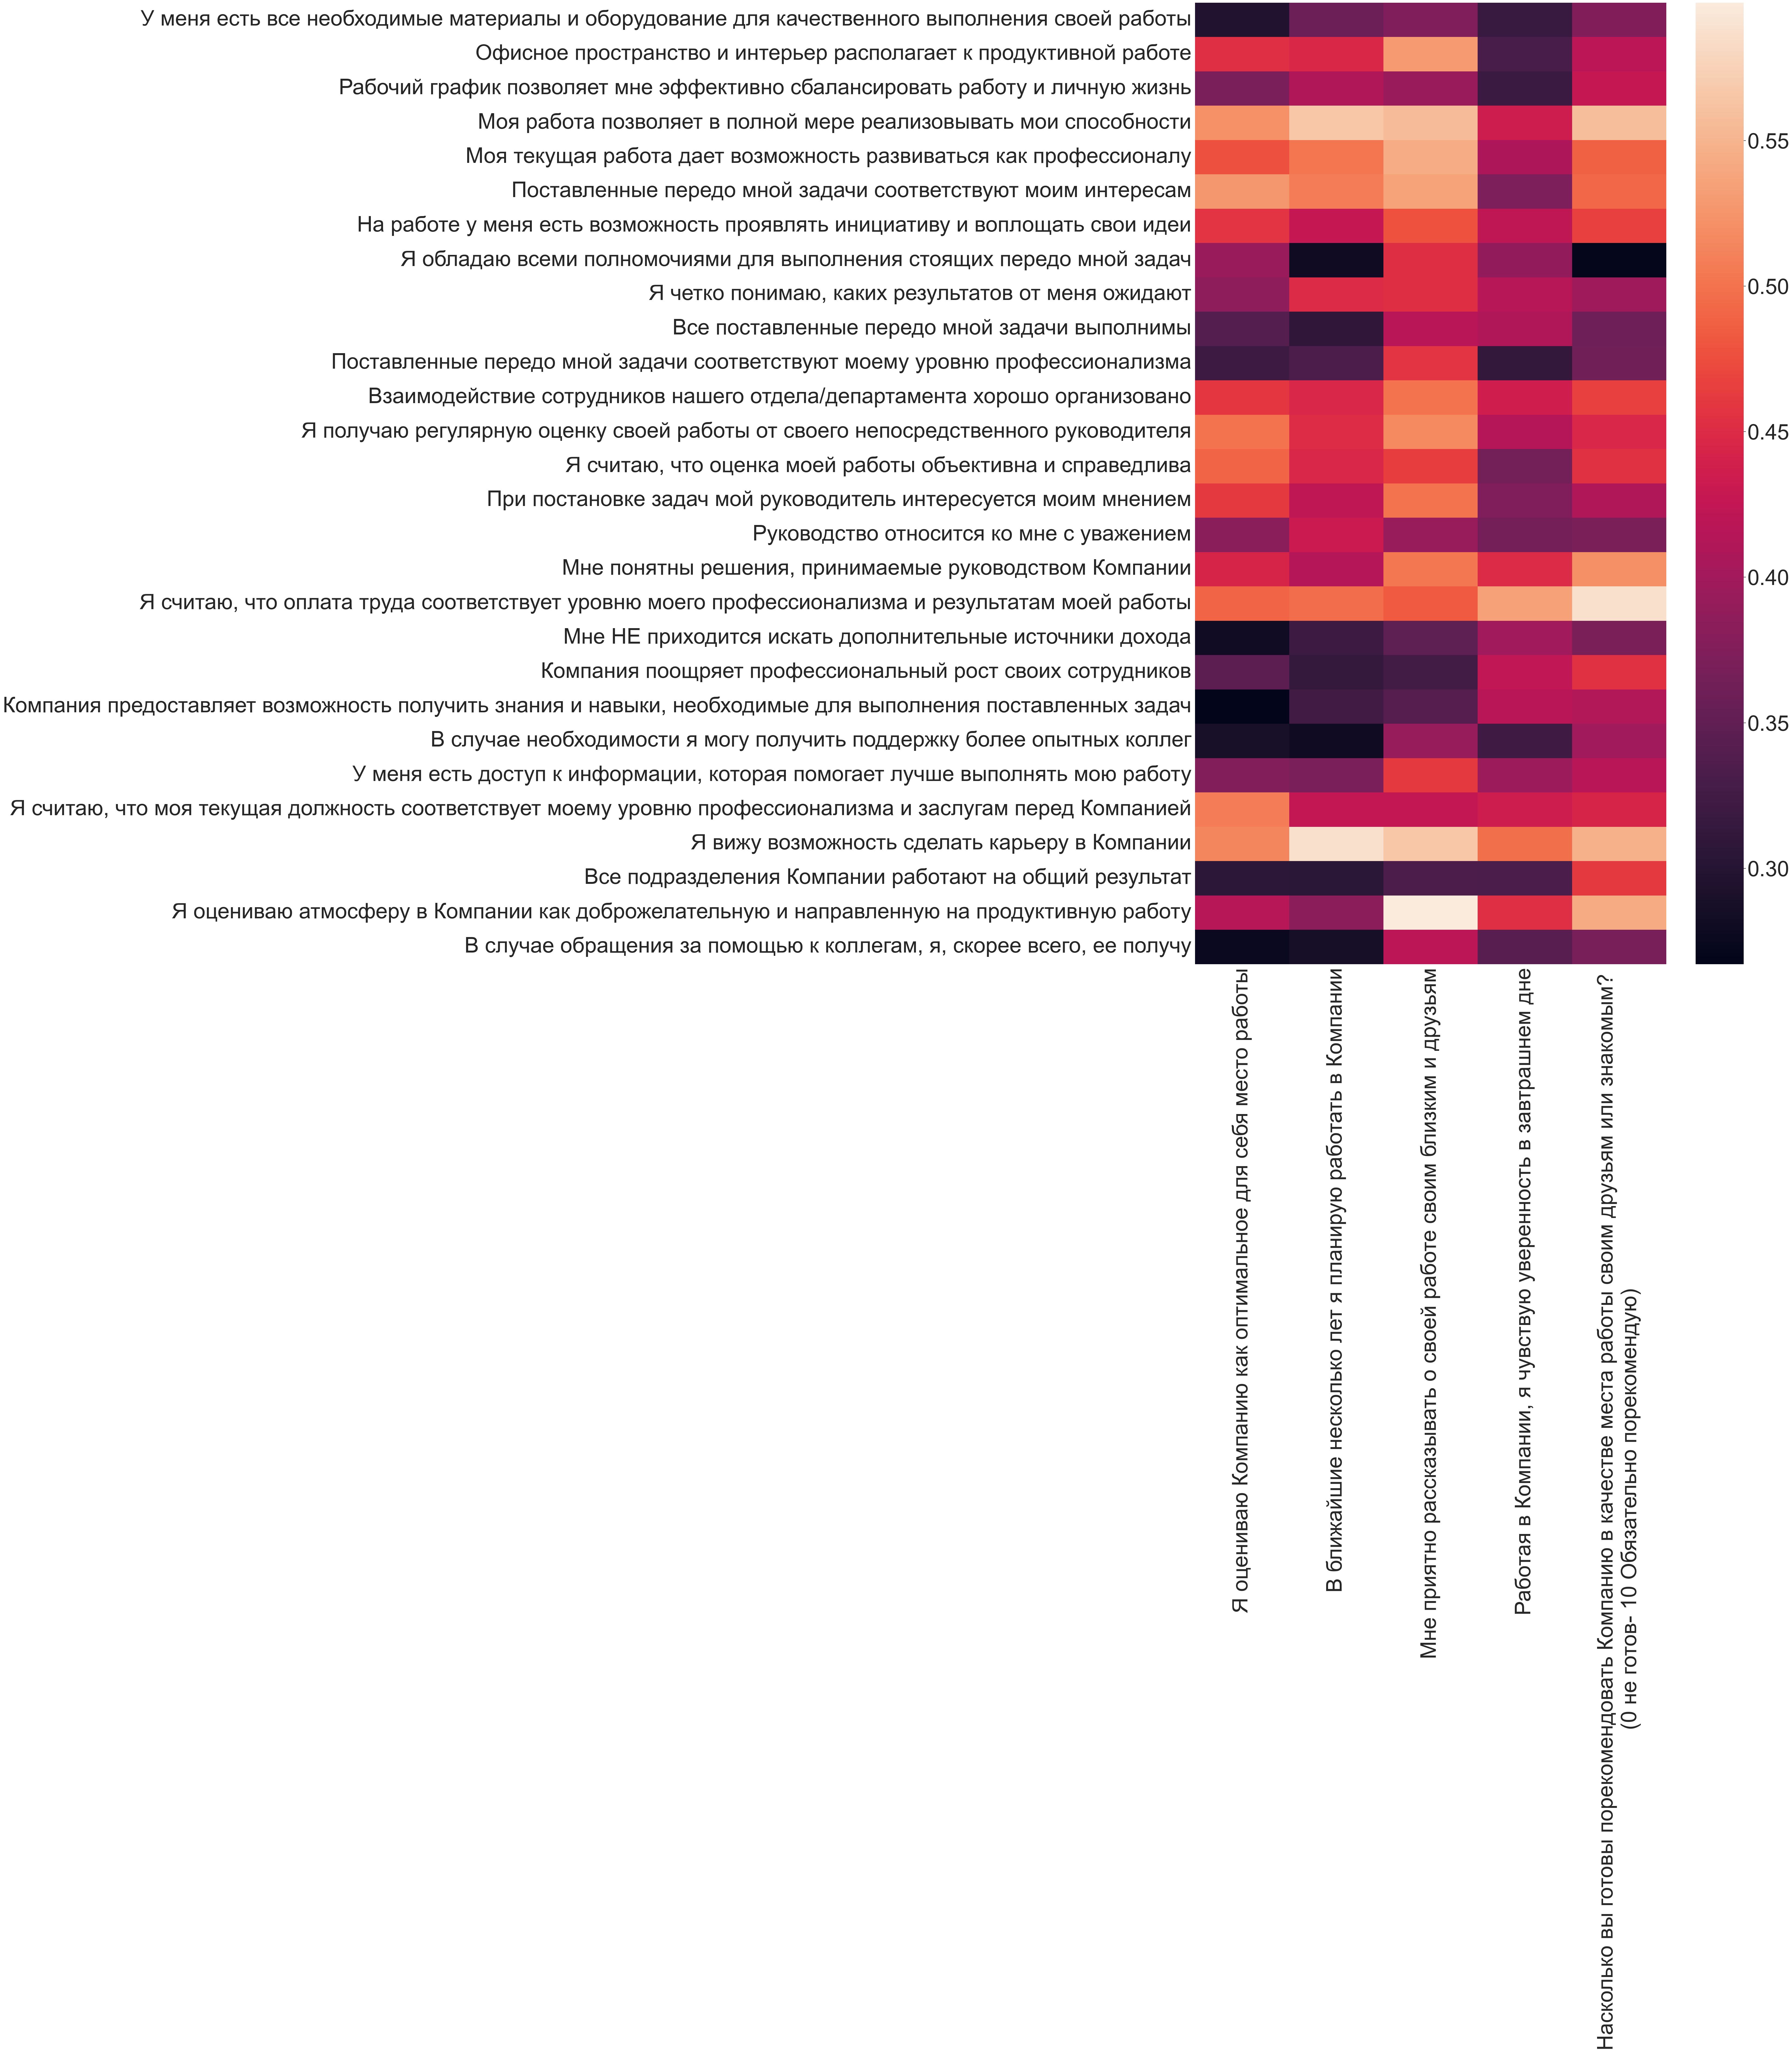

In [91]:
sns.set(font_scale=5.2)
plt.figure(figsize=(28, 46))
sns.heatmap(corr[list_corr])
plt.show()

In [177]:
list_corr = [
             'Я оцениваю Компанию как оптимальное для себя место работы',
             'В ближайшие несколько лет я планирую работать в Компании',
             'Мне приятно рассказывать о своей работе своим близким и друзьям',
             'Работая в Компании, я чувствую уверенность в завтрашнем дне', 
             'Насколько вы готовы порекомендовать Компанию в качестве места работы своим друзьям или знакомым? \n(0 не готов- 10 Обязательно порекомендую)'
            ]
corr_opr = [
    'Я вижу возможность сделать карьеру в Компании',
    'Моя работа позволяет в полной мере реализовывать мои способности',
    'Я считаю, что оплата труда соответствует уровню моего профессионализма и результатам моей работы',
]
sp = []
models = []
for _ in list_corr:
    y = encoder(_, 1)[0].values.reshape(-1, 1)
    X = [[encoder(j, 1)[0].values[i] for j in corr_opr] for i in range(len(y))]

    model = sm.OLS(y, sm.add_constant(X)).fit()
    models.append(model)
    sp.append(model.params)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     76.48
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.89e-34
Time:                        19:46:58   Log-Likelihood:                -257.29
No. Observations:                 232   AIC:                             522.6
Df Residuals:                     228   BIC:                             536.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5821      0.221      2.629      0.009       0.146       1.018
x1             0.2485      0.057      4.377      0.000       0.137       0.360
x2             0.2718      0.061      4.458      0.000       0.152       0.392
x3             0.3728      0.053      7.011      0.000       0.268       0.478
==============================================================================
Omnibus:                       10.106   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.173
Skew:                          -0.360   Prob(JB):                      0.00227
Kurtosis:                       3.861   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
models[4].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     76.48
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.89e-34
Time:                        19:50:20   Log-Likelihood:                -257.29
No. Observations:                 232   AIC:                             522.6
Df Residuals:                     228   BIC:                             536.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5821      0.221      2.629      0.009       0.146       1.018
x1             0.2485      0.057      4.377      0.000       0.137       0.360
x2             0.2718      0.061      4.458      0.000       0.152       0.392
x3             0.3728      0.053      7.011      0.000       0.268       0.478
==============================================================================
Omnibus:                       10.106   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.173
Skew:                          -0.360   Prob(JB):                      0.00227
Kurtosis:                       3.861   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
mean_points = df1[corr_opr].mean().values
changes = np.array([i*0.05 for i in range(10)], dtype="float64")

In [186]:
import numpy as np
X, Y = [], []
for i in range(len(list_corr)):
    X.append([])
    Y.append([])   
    for j in changes:
        mean = mean_points + j
        X[i].append(np.mean(mean))
        mean *= sp[i][1::]
        Y[i].append(np.sum(mean)+sp[i][0])

In [189]:
plt.figure(figsize=(35, 150))
for i in range(len(Y)):
    plt.subplot(5, 1, i+1)
    plt.plot(X[i], Y[i], linewidth=5)
    plt.title(list_corr[i], fontsize=80)
    plt.grid(True)  # Добавить сетку на график

plt.subplots_adjust(hspace=0.5)
plt.show()


In [193]:
display(Y)

[[4.112068965517242,
  4.143798890901712,
  4.175528816286181,
  4.20725874167065,
  4.23898866705512,
  4.270718592439589,
  4.302448517824058,
  4.334178443208527,
  4.365908368592997,
  4.397638293977467],
 [4.000000000000001,
  4.038911540597095,
  4.077823081194188,
  4.116734621791279,
  4.155646162388372,
  4.194557702985466,
  4.233469243582559,
  4.272380784179652,
  4.311292324776745,
  4.350203865373837],
 [4.198275862068966,
  4.233747972917254,
  4.269220083765543,
  4.30469219461383,
  4.340164305462118,
  4.375636416310407,
  4.411108527158694,
  4.446580638006983,
  4.482052748855271,
  4.517524859703559],
 [4.030172413793105,
  4.064034678932247,
  4.09789694407139,
  4.131759209210532,
  4.165621474349676,
  4.199483739488819,
  4.233346004627961,
  4.267208269767105,
  4.301070534906247,
  4.33493280004539],
 [3.799568965517243,
  3.8442199057313595,
  3.888870845945477,
  3.933521786159594,
  3.978172726373711,
  4.022823666587828,
  4.067474606801945,
  4.112125547

In [78]:

for i in df.columns[4:-4]:
    print(i, "!!!!!!!!!!!!!!!!!!!!!")
    value_encoded1 = encoder(i, 1)
    for j in df.columns[4:-4]:
        value_encoded2 = encoder(j, 1)
        print(j)
        print(value_encoded1[0].corr(value_encoded2[0]))
        print()
        
        

Я оцениваю Компанию как оптимальное для себя место работы !!!!!!!!!!!!!!!!!!!!!
Я оцениваю Компанию как оптимальное для себя место работы
0.9999999999999999

В ближайшие несколько лет я планирую работать в Компании
0.6982740502063347

У меня есть все необходимые материалы и оборудование для качественного выполнения своей работы
0.2962081365808156

Офисное пространство и интерьер располагает к продуктивной работе
0.45374578324853554

Рабочий график позволяет мне эффективно сбалансировать работу и личную жизнь
0.3694871427488379

Мне приятно рассказывать о своей работе своим близким и друзьям
0.6135265650986317

Моя работа позволяет в полной мере реализовывать мои способности
0.5214037641153293

Моя текущая работа дает возможность развиваться как профессионалу
0.4771023696986211

Поставленные передо мной задачи соответствуют моим интересам
0.527706452817936

На работе у меня есть возможность проявлять инициативу и воплощать свои идеи
0.4571827258055016

Я обладаю всеми полномочиями для в

Я получаю регулярную оценку своей работы от своего непосредственного руководителя
0.44769830954239964

Я считаю, что оценка моей работы объективна и справедлива
0.479452544655151

При постановке задач мой руководитель интересуется моим мнением
0.3962816284474454

Руководство относится ко мне с уважением
0.4132768671979566

Мне понятны решения, принимаемые руководством Компании
0.40523594621666786

Я считаю, что оплата труда соответствует уровню моего профессионализма и результатам моей работы
0.4274101929716832

Работая в Компании, я чувствую уверенность в завтрашнем дне
0.43427310333231856

Мне НЕ приходится искать дополнительные источники дохода
0.3559015023206759

Компания поощряет профессиональный рост своих сотрудников
0.3239160797033027

Компания предоставляет возможность получить знания и навыки, необходимые для выполнения поставленных задач
0.31617888623201645

В случае необходимости я могу получить поддержку более опытных коллег
0.3298231104421483

У меня есть доступ к информа

0.519548745874663

При постановке задач мой руководитель интересуется моим мнением
0.4334259545989752

Руководство относится ко мне с уважением
0.36519125782926487

Мне понятны решения, принимаемые руководством Компании
0.4513437675755856

Я считаю, что оплата труда соответствует уровню моего профессионализма и результатам моей работы
0.36731092222313877

Работая в Компании, я чувствую уверенность в завтрашнем дне
0.4366272728152807

Мне НЕ приходится искать дополнительные источники дохода
0.21482390327118467

Компания поощряет профессиональный рост своих сотрудников
0.4424172535765489

Компания предоставляет возможность получить знания и навыки, необходимые для выполнения поставленных задач
0.3555457361284689

В случае необходимости я могу получить поддержку более опытных коллег
0.42902454386475986

У меня есть доступ к информации, которая помогает лучше выполнять мою работу
0.3822045199421971

Я считаю, что моя текущая должность соответствует моему уровню профессионализма и заслугам 

0.37454274050784175

Работая в Компании, я чувствую уверенность в завтрашнем дне
0.42447460069848264

Мне НЕ приходится искать дополнительные источники дохода
0.2578642388606897

Компания поощряет профессиональный рост своих сотрудников
0.9999999999999999

Компания предоставляет возможность получить знания и навыки, необходимые для выполнения поставленных задач
0.6742431613128608

В случае необходимости я могу получить поддержку более опытных коллег
0.3887237868887365

У меня есть доступ к информации, которая помогает лучше выполнять мою работу
0.432438396574438

Я считаю, что моя текущая должность соответствует моему уровню профессионализма и заслугам перед Компанией
0.34097298921472496

Я вижу возможность сделать карьеру в Компании
0.3779445180386773

Все подразделения Компании работают на общий результат
0.3684204335934745

Я оцениваю атмосферу в Компании как доброжелательную и направленную на продуктивную работу
0.38592692326682

В случае обращения за помощью к коллегам, я, скорее 

0.48168977223465886

Все подразделения Компании работают на общий результат
0.5868631905117601

Я оцениваю атмосферу в Компании как доброжелательную и направленную на продуктивную работу
1.0

В случае обращения за помощью к коллегам, я, скорее всего, ее получу
0.5509889894173166

Насколько вы готовы порекомендовать Компанию в качестве места работы своим друзьям или знакомым? 
(0 не готов- 10 Обязательно порекомендую)
0.5421436036222507

В случае обращения за помощью к коллегам, я, скорее всего, ее получу !!!!!!!!!!!!!!!!!!!!!
Я оцениваю Компанию как оптимальное для себя место работы
0.2765065663507728

В ближайшие несколько лет я планирую работать в Компании
0.28664444763500924

У меня есть все необходимые материалы и оборудование для качественного выполнения своей работы
0.2862423479259009

Офисное пространство и интерьер располагает к продуктивной работе
0.334060752242295

Рабочий график позволяет мне эффективно сбалансировать работу и личную жизнь
0.242480661957086

Мне приятно расс

Корреляция между показателями лояльности и выбранными признаками

In [25]:
list_corr = [
             'Я оцениваю Компанию как оптимальное для себя место работы',
             'В ближайшие несколько лет я планирую работать в Компании',
             'Мне приятно рассказывать о своей работе своим близким и друзьям',
             'Работая в Компании, я чувствую уверенность в завтрашнем дне', 
             'Насколько вы готовы порекомендовать Компанию в качестве места работы своим друзьям или знакомым? \n(0 не готов- 10 Обязательно порекомендую)'
            ]

first_pr = [
    'Офисное пространство и интерьер располагает к продуктивной работе',
    'Моя работа позволяет в полной мере реализовывать мои способности',
    'Я получаю регулярную оценку своей работы от своего непосредственного руководителя',
    'Я считаю, что оплата труда соответствует уровню моего профессионализма и результатам моей работы',
]

for i in list_corr:
    value_encoded1 = encoder(i, 1)
    for j in first_pr:
        value_encoded2 = encoder(j, 1)
        print('"', i,'" коррелирует с:\n"', j, '" на', value_encoded1[0].corr(value_encoded2[0]))

        print()

" Я оцениваю Компанию как оптимальное для себя место работы " коррелирует с:
" Офисное пространство и интерьер располагает к продуктивной работе " на 0.45374578324853554

" Я оцениваю Компанию как оптимальное для себя место работы " коррелирует с:
" Моя работа позволяет в полной мере реализовывать мои способности " на 0.5214037641153293

" Я оцениваю Компанию как оптимальное для себя место работы " коррелирует с:
" Я получаю регулярную оценку своей работы от своего непосредственного руководителя " на 0.5003644171290205

" Я оцениваю Компанию как оптимальное для себя место работы " коррелирует с:
" Я считаю, что оплата труда соответствует уровню моего профессионализма и результатам моей работы " на 0.4892467454298946

" В ближайшие несколько лет я планирую работать в Компании " коррелирует с:
" Офисное пространство и интерьер располагает к продуктивной работе " на 0.44736819246580073

" В ближайшие несколько лет я планирую работать в Компании " коррелирует с:
" Моя работа позволяет в по

Анализ количества удовлетворенных и неудовлетворённых сотрудников по отделам

Административный персонал (ДСА, ФД, ДУП, ОКУ, ОСО)


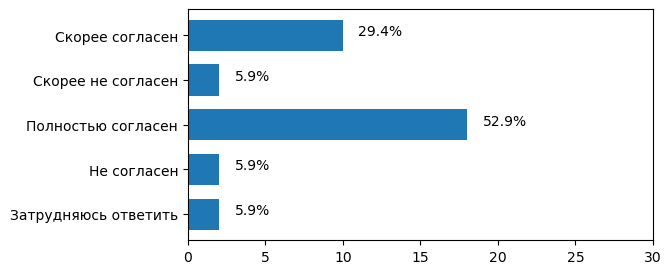

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Менеджмент (управление отделом, группой, департаментом)


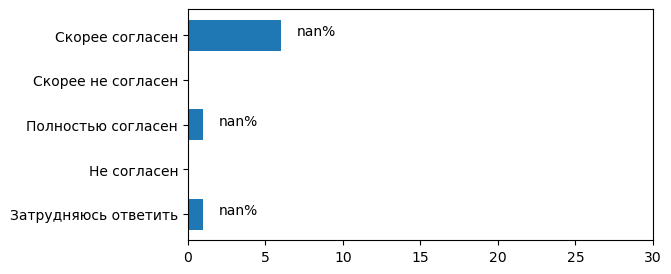

Методико-аналитическая деятельность (все депаратаменты)


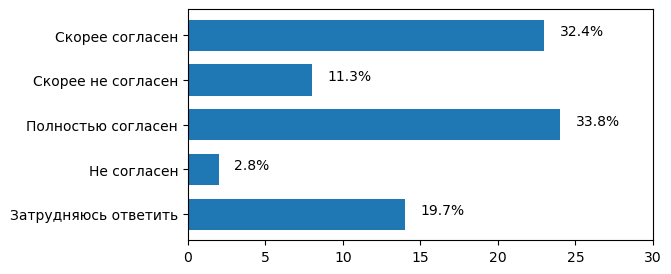

Разработка, программирование (все стеки, все департаменты)


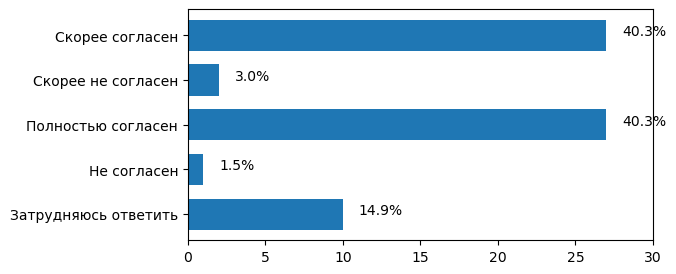

posx and posy should be finite values
posx and posy should be finite values


Сопровождение клиентов, продажи, сопровождение пользователей, ЛК


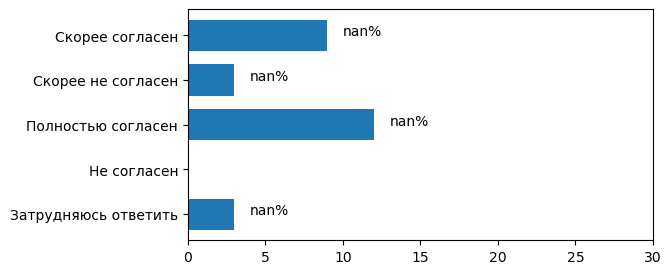

Управление проектной, продуктовой деятельностью


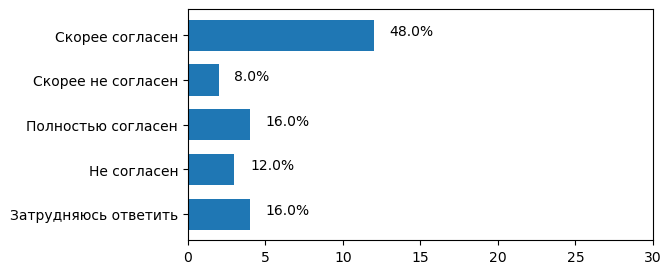

In [26]:
dff1 = df.pivot_table(index='Укажите, пожалуйста, сферу деятельности, в которой вы работаете',columns='Офисное пространство и интерьер располагает к продуктивной работе', aggfunc='count')['age_category']

for i in dff1.index:
    print(i)
    fig, ax = plt.subplots(figsize=(6,3))
    ax.barh(dff1.columns, dff1.loc[i], linewidth=5, height=0.7)
    ax.set_xlim([0, 30])
    for j, v in enumerate(dff1.loc[i]):
        ax.text(v+1, j, f"{v/sum(dff1.loc[i])*100:.1f}%", color='black', fontsize=10)
    plt.show()

posx and posy should be finite values


Административный персонал (ДСА, ФД, ДУП, ОКУ, ОСО)


posx and posy should be finite values


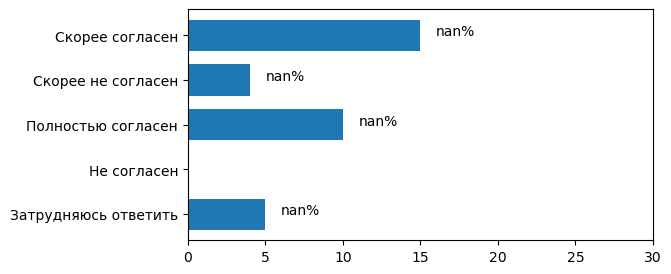

posx and posy should be finite values
posx and posy should be finite values


Менеджмент (управление отделом, группой, департаментом)


posx and posy should be finite values
posx and posy should be finite values


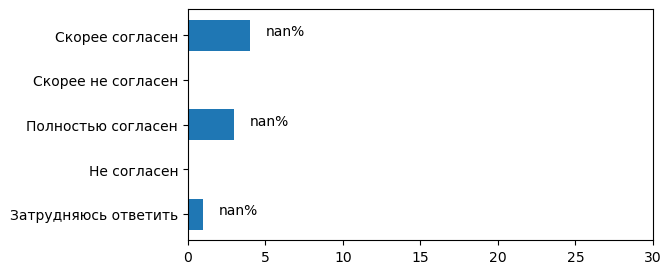

Методико-аналитическая деятельность (все депаратаменты)


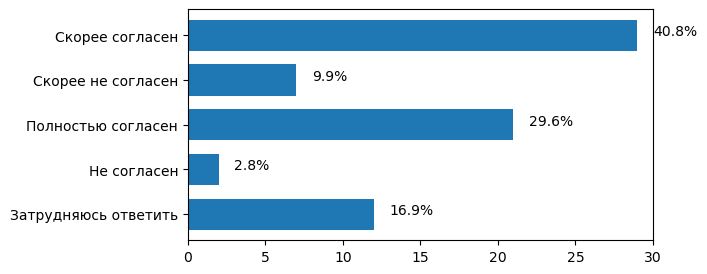

Разработка, программирование (все стеки, все департаменты)


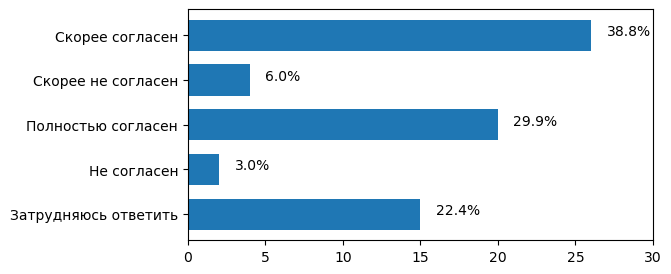

posx and posy should be finite values
posx and posy should be finite values


Сопровождение клиентов, продажи, сопровождение пользователей, ЛК


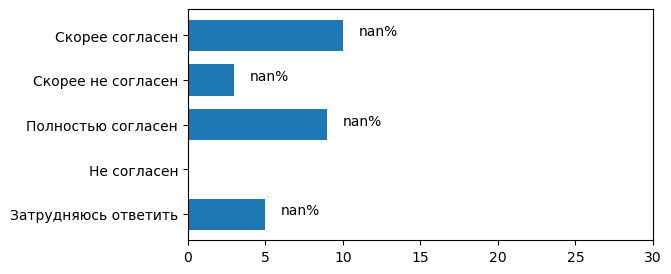

posx and posy should be finite values
posx and posy should be finite values


Управление проектной, продуктовой деятельностью


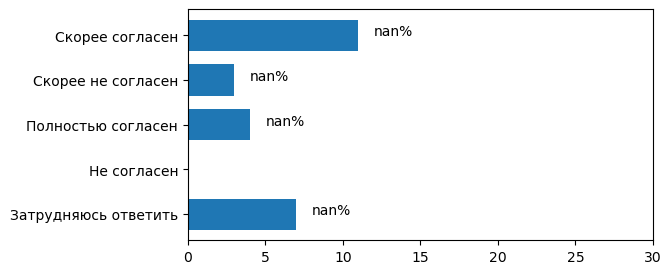

In [27]:
dff2 = df.pivot_table(index='Укажите, пожалуйста, сферу деятельности, в которой вы работаете',columns='Моя работа позволяет в полной мере реализовывать мои способности', aggfunc='count')['age_category']

for i in dff2.index:
    print(i)
    fig, ax = plt.subplots(figsize=(6,3))
    ax.barh(dff2.columns, dff2.loc[i], linewidth=5, height=0.7)
    ax.set_xlim([0, 30])
    for j, v in enumerate(dff2.loc[i]):
        ax.text(v+1, j, f"{v/sum(dff2.loc[i])*100:.1f}%", color='black', fontsize=10)
    plt.show()

Административный персонал (ДСА, ФД, ДУП, ОКУ, ОСО)


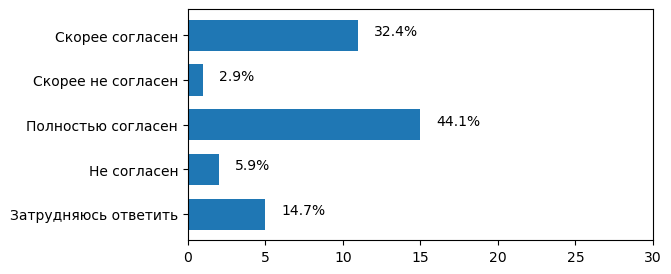

posx and posy should be finite values
posx and posy should be finite values


Менеджмент (управление отделом, группой, департаментом)


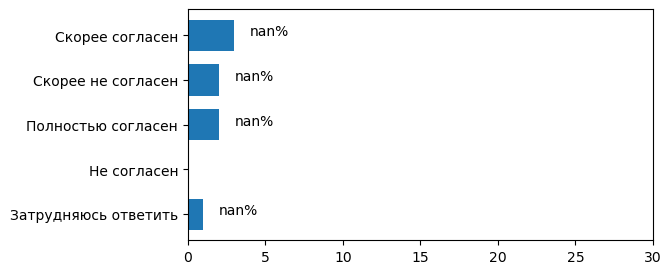

Методико-аналитическая деятельность (все депаратаменты)


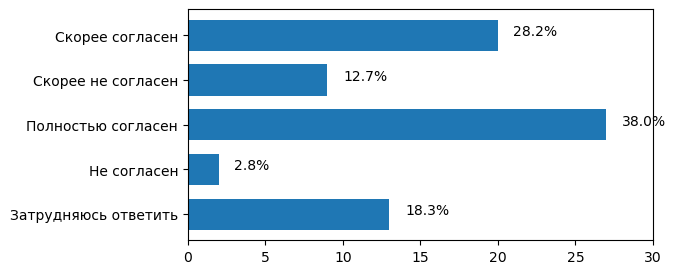

Разработка, программирование (все стеки, все департаменты)


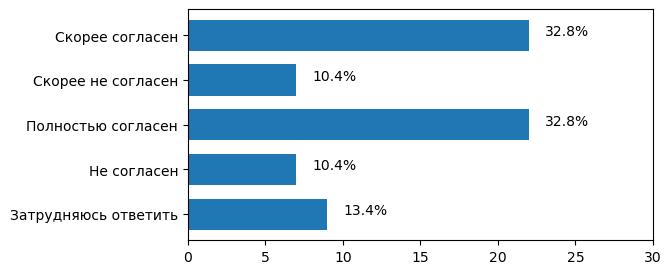

Сопровождение клиентов, продажи, сопровождение пользователей, ЛК


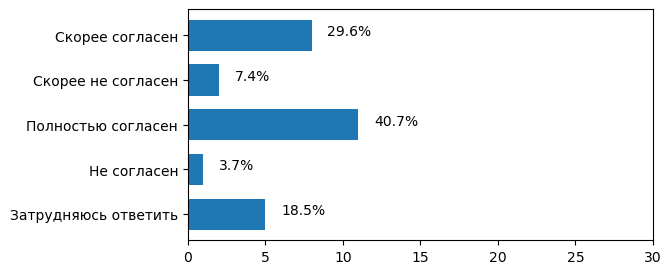

Управление проектной, продуктовой деятельностью


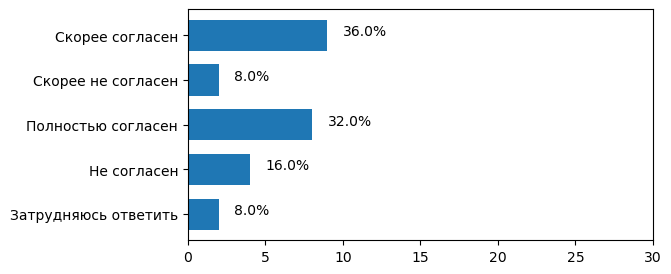

In [28]:
dff3 = df.pivot_table(index='Укажите, пожалуйста, сферу деятельности, в которой вы работаете',columns='Я получаю регулярную оценку своей работы от своего непосредственного руководителя', aggfunc='count')['age_category']

for i in dff3.index:
    print(i)
    fig, ax = plt.subplots(figsize=(6,3))
    ax.barh(dff3.columns, dff3.loc[i], linewidth=5, height=0.7)
    ax.set_xlim([0, 30])
    for j, v in enumerate(dff3.loc[i]):
        ax.text(v+1, j, f"{v/sum(dff3.loc[i])*100:.1f}%", color='black', fontsize=10)
    plt.show()

Административный персонал (ДСА, ФД, ДУП, ОКУ, ОСО)


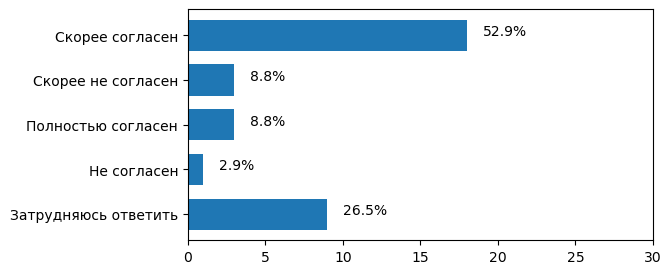

posx and posy should be finite values
posx and posy should be finite values


Менеджмент (управление отделом, группой, департаментом)


posx and posy should be finite values
posx and posy should be finite values


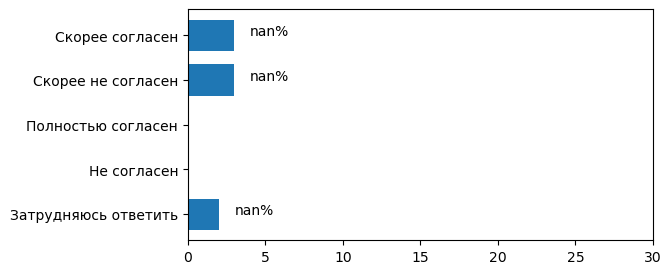

Методико-аналитическая деятельность (все депаратаменты)


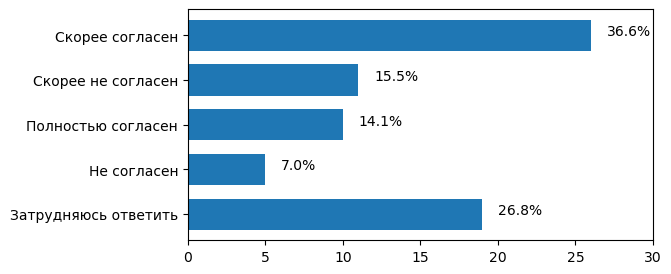

Разработка, программирование (все стеки, все департаменты)


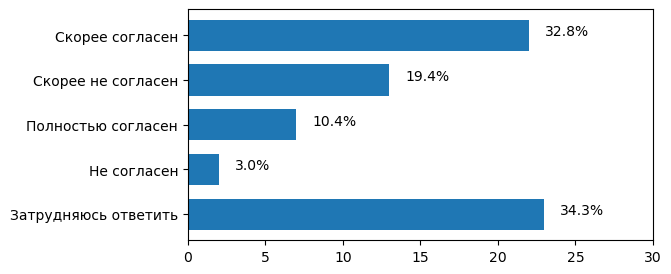

Сопровождение клиентов, продажи, сопровождение пользователей, ЛК


posx and posy should be finite values
posx and posy should be finite values


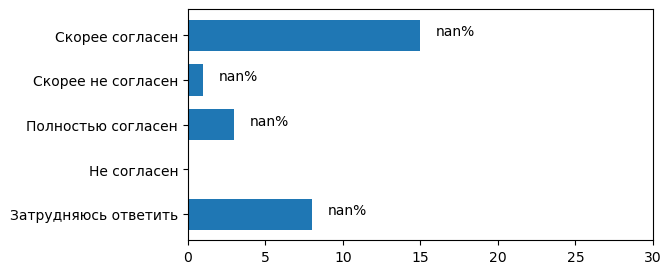

Управление проектной, продуктовой деятельностью


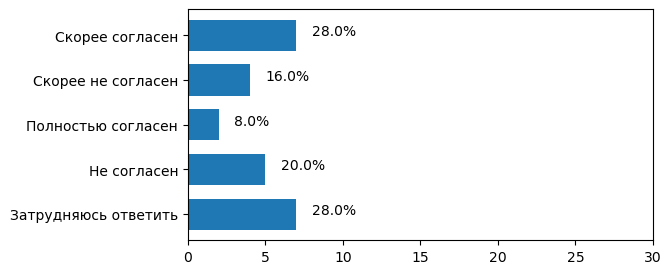

In [29]:
dff4 = df.pivot_table(index='Укажите, пожалуйста, сферу деятельности, в которой вы работаете',columns='Я считаю, что оплата труда соответствует уровню моего профессионализма и результатам моей работы', aggfunc='count')['age_category']

for i in dff4.index:
    print(i)
    fig, ax = plt.subplots(figsize=(6,3))
    ax.barh(dff4.columns, dff4.loc[i], linewidth=5, height=0.7)
    ax.set_xlim([0, 30])
    for j, v in enumerate(dff4.loc[i]):
        ax.text(v+1, j, f"{v/sum(dff4.loc[i])*100:.1f}%", color='black', fontsize=10)
    plt.show()

Регрессионный анализ зависимости показателей лояльности от выбранных признаков. Оценка параметра R-squared.

In [30]:
first_pr = [
    'Офисное пространство и интерьер располагает к продуктивной работе',
    'Моя работа позволяет в полной мере реализовывать мои способности',
    'Я считаю, что оплата труда соответствует уровню моего профессионализма и результатам моей работы',
    'Я получаю регулярную оценку своей работы от своего непосредственного руководителя',
            ]

list_corr = [
             'Я оцениваю Компанию как оптимальное для себя место работы',
             'В ближайшие несколько лет я планирую работать в Компании',
             'Мне приятно рассказывать о своей работе своим близким и друзьям',
             'Работая в Компании, я чувствую уверенность в завтрашнем дне', 
             'Насколько вы готовы порекомендовать Компанию в качестве места работы своим друзьям или знакомым? \n(0 не готов- 10 Обязательно порекомендую)'
            ]
sp = []

for _ in list_corr:
    y = encoder(_, 1)[0].values.reshape(-1, 1)
    X = [[encoder(j, 1)[0].values[i] for j in first_pr] for i in range(len(y))]

    model = sm.OLS(y, sm.add_constant(X)).fit()
    sp.append(model.rsquared)
for i in range(len(list_corr)):
    print('R-squared для ', list_corr[i], ":", sp[i])

R-squared для  Я оцениваю Компанию как оптимальное для себя место работы : 0.4508110713649158
R-squared для  В ближайшие несколько лет я планирую работать в Компании : 0.4606310059999005
R-squared для  Мне приятно рассказывать о своей работе своим близким и друзьям : 0.5097762835808807
R-squared для  Работая в Компании, я чувствую уверенность в завтрашнем дне : 0.3754906594944162
R-squared для  Насколько вы готовы порекомендовать Компанию в качестве места работы своим друзьям или знакомым? 
(0 не готов- 10 Обязательно порекомендую) : 0.5023968607607487
